Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.utils import plot_model

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

data_dir_train = pathlib.Path(r'/content/gdrive/Othercomputers/My Laptop/AI-ML/Main Course Content/Deep Learning/Melanoma Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path(r'/content/gdrive/Othercomputers/My Laptop/AI-ML/Main Course Content/Deep Learning/Melanoma Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
# data_dir_train = pathlib.Path("D:\AI-ML\Main Course Content\Deep Learning\Melanoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
# data_dir_test = pathlib.Path("D:\AI-ML\Main Course Content\Deep Learning\Melanoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180
validation_split = 0.2
seed_train_validation = 123
shuffle_value = True

Use 80% of the images for training, and 20% for validation.

In [ ]:
#https://stackoverflow.com/questions/66036271/splitting-a-tensorflow-dataset-into-training-test-and-validation-sets-from-ker
# help(tf.keras.preprocessing.image_dataset_from_directory)

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_train,
                                                               batch_size=batch_size,
                                                               image_size = (img_height, img_width),
                                                               validation_split = validation_split,
                                                               subset = "training",
                                                               seed = seed_train_validation,
                                                               color_mode = 'rgb',
                                                               shuffle = shuffle_value)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_train,
                                                             batch_size=batch_size,
                                                             image_size = (img_height, img_width),
                                                             validation_split = validation_split,
                                                             subset = "validation",
                                                             seed = seed_train_validation,
                                                             color_mode = 'rgb',
                                                             shuffle = shuffle_value)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

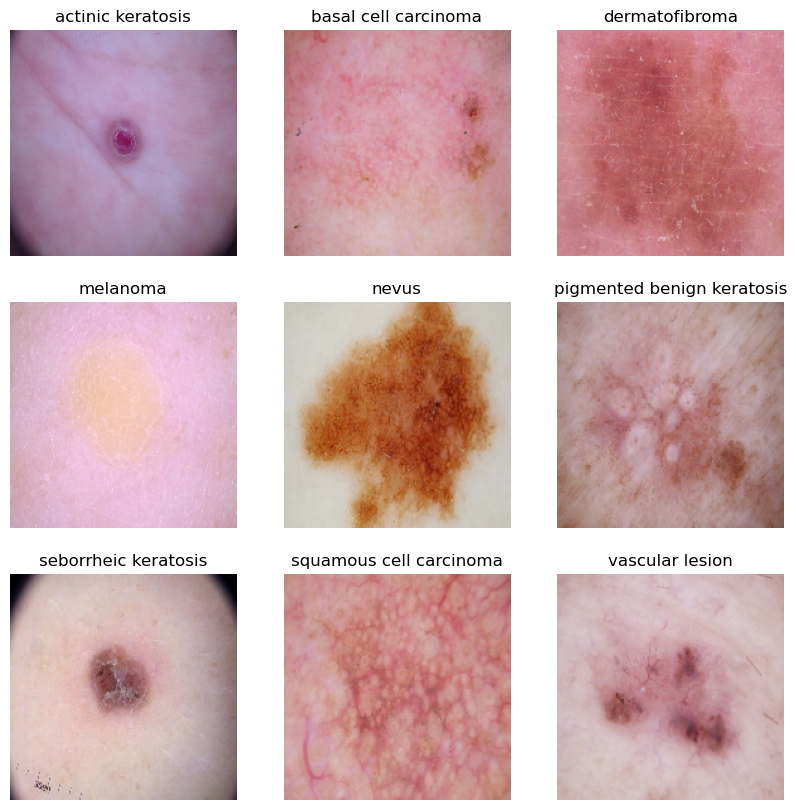

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [10]:
### Your code goes here
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer
model= Sequential([
       tf.keras.layers.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)),
       #First convolving layer
       layers.Conv2D(16,kernel_size=(3,3), padding='same',activation='relu'),
       layers.MaxPooling2D(),
       #Second convolving layer
       layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'),
       layers.MaxPooling2D(),
       #Third convolving layer
       layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='relu'),
       layers.MaxPooling2D(),
       #Dropout layer with 50% Fraction of the input units to drop.
       layers.Dropout(0.5),
       #adding the Flatten layer
       layers.Flatten(),
       # adding Dense layer
       layers.Dense(128, activation='relu'),
       #Dropout layer with 25% Fraction of the input units to drop.
       layers.Dropout(0.25),
       layers.Dense(len(class_names))

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

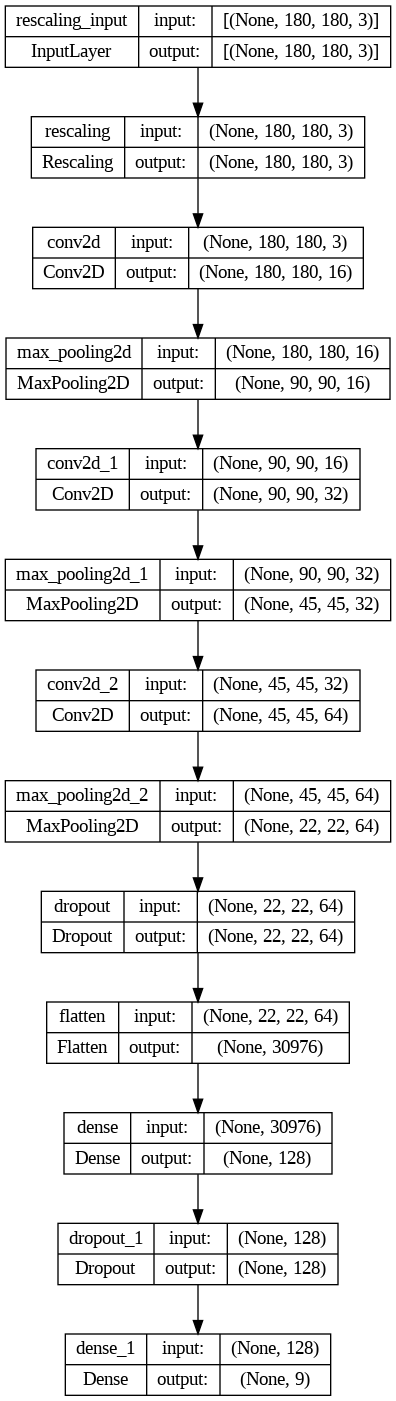

In [11]:
# vizualizing the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

In [13]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 [==============================] - 1849s 1s/step - loss: 1.7852 - accuracy: 0.3093 - val_loss: 1.5827 - val_accuracy: 0.4201
Epoch 2/20
281/281 [==============================] - 8s 28ms/step - loss: 1.4581 - accuracy: 0.4378 - val_loss: 1.3617 - val_accuracy: 0.4846
Epoch 3/20
281/281 [==============================] - 8s 28ms/step - loss: 1.3781 - accuracy: 0.4693 - val_loss: 1.4542 - val_accuracy: 0.4633
Epoch 4/20
281/281 [==============================] - 8s 29ms/step - loss: 1.2911 - accuracy: 0.5068 - val_loss: 1.3168 - val_accuracy: 0.4735
Epoch 5/20
281/281 [==============================] - 8s 29ms/step - loss: 1.2362 - accuracy: 0.5302 - val_loss: 1.3957 - val_accuracy: 0.4539
Epoch 6/20
281/281 [==============================] - 8s 28ms/step - loss: 1.1606 - accuracy: 0.5571 - val_loss: 1.1680 - val_accuracy: 0.5398
Epoch 7/20
281/281 [==============================] - 8s 28ms/step - loss: 1.0926 - accuracy: 0.5859 - val_loss: 1.1550 - val_accuracy: 0.579

### Visualizing training results

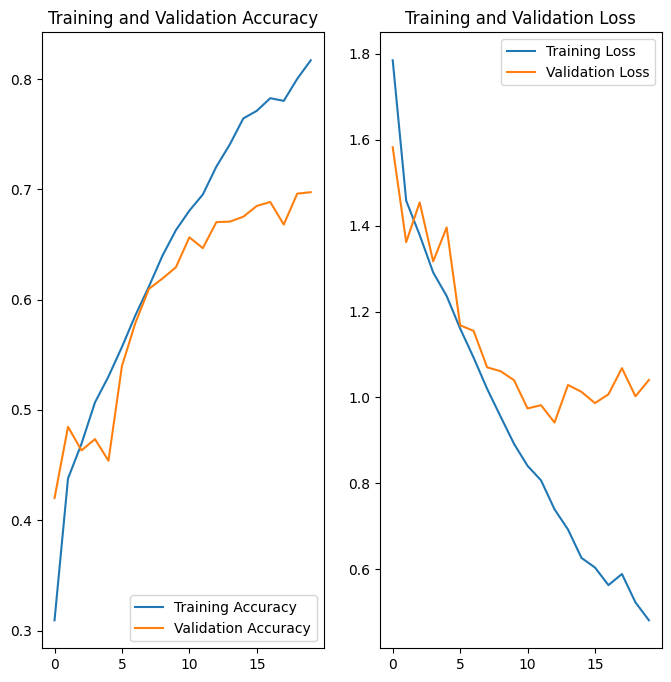

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

In [15]:
## Your code goes here.

def class_dist_cnt(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'Number of Image'])

df = class_dist_cnt(data_dir_train)
df

,Class,Number of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


### Write your findings here

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    tf.keras.layers.RandomCrop(img_height,img_width),
  ]
)

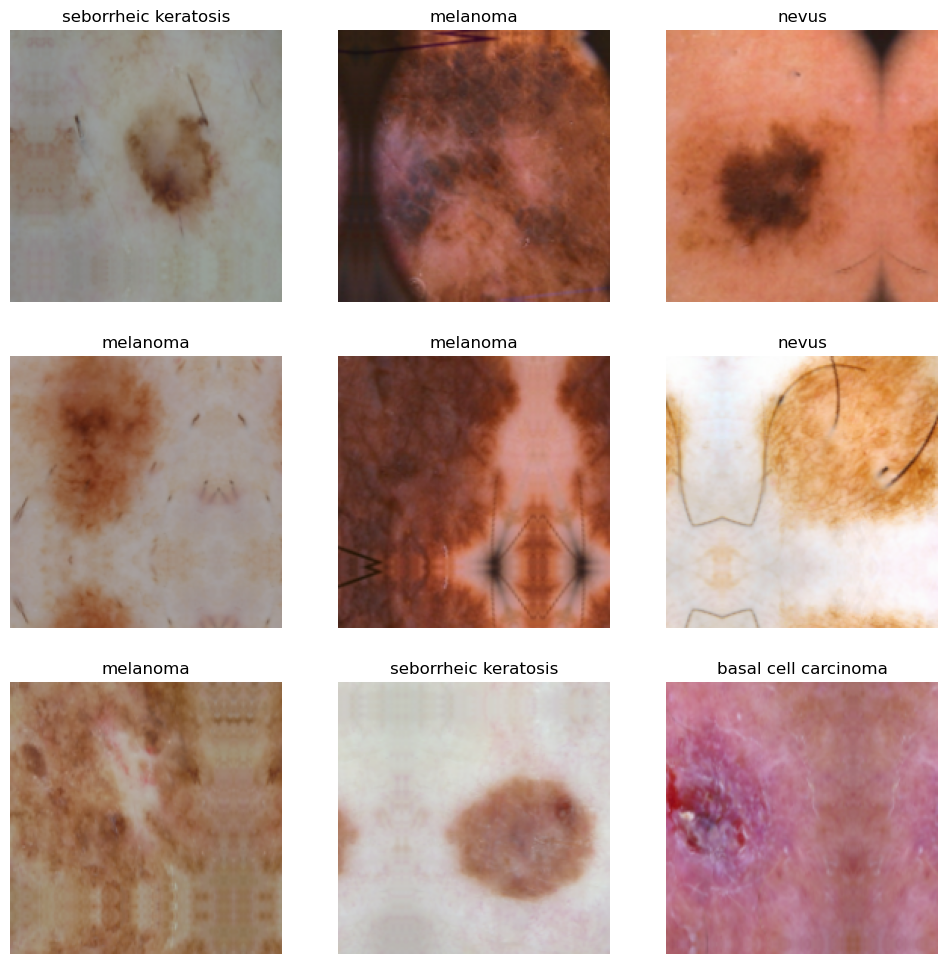

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

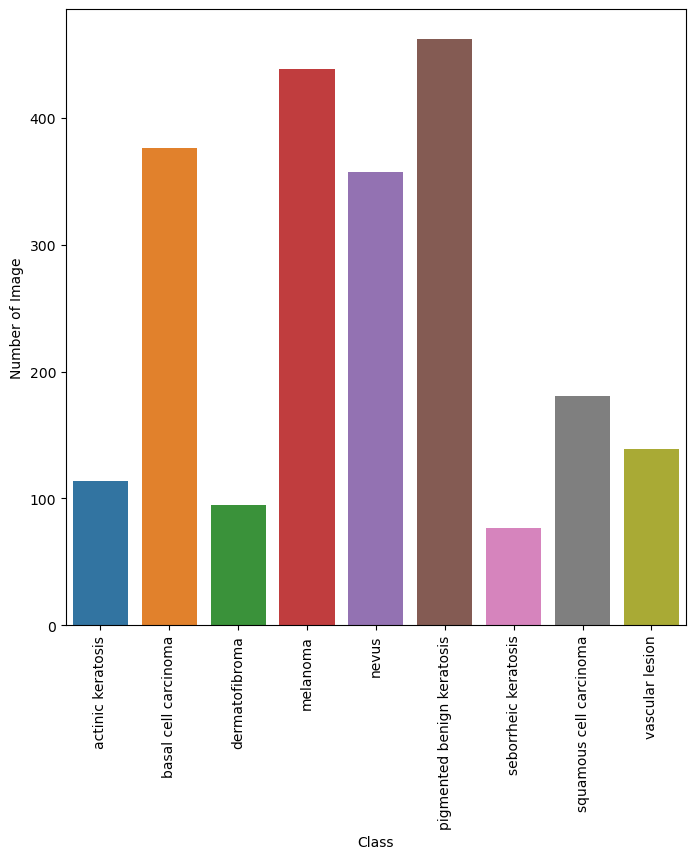

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.barplot(y="Number of Image", x="Class", data=df,
            label="Class")
plt.xticks(rotation=90)  # Rotate x-labels by 90 degrees
plt.show()

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
### Your code goes here
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer
model = Sequential([data_augmentation, tf.keras.layers.Rescaling(1/255,input_shape=(180,180,3))])

#model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
# model.add(tf.keras.layers.Rescaling(1./255,input_shape=(180,180,3)))

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
#Dropout layer with 50% Fraction of the input units to drop.
# model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()



In [ ]:
# vizualizing the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Compiling the model

In [ ]:
## Your code goes here
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

### Visualizing the results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [17]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
# path_to_training_dataset="D:\AI-ML\Main Course Content\Deep Learning\Melanoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"
path_to_training_dataset="/content/gdrive/Othercomputers/My Laptop/AI-ML/Main Course Content/Deep Learning/Melanoma Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

import Augmentor
for i in class_names:
    path = path_to_training_dataset + '\\' + i
#     path = path_to_training_dataset + '/' + i

    p = Augmentor.Pipeline(path, save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
    p.flip_left_right(probability=0.4)
    p.flip_top_bottom(probability=0.8)
    p.sample(1000) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to D:\AI-ML\Main Course Content\Deep Learning\Melanoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16B3404CF50>: 100%|█| 1000/1000 [00:09<00:00, 107.63 Sampl


Initialised with 376 image(s) found.
Output directory set to D:\AI-ML\Main Course Content\Deep Learning\Melanoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16B355A6610>: 100%|█| 1000/1000 [00:09<00:00, 100.91 Sampl


Initialised with 95 image(s) found.
Output directory set to D:\AI-ML\Main Course Content\Deep Learning\Melanoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16B3404ED10>: 100%|█| 1000/1000 [00:10<00:00, 98.12 Sample


Initialised with 438 image(s) found.
Output directory set to D:\AI-ML\Main Course Content\Deep Learning\Melanoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x16B2896C9D0>: 100%|█| 1000/1000 [00:49<00:00, 20.12 Sampl


Initialised with 357 image(s) found.
Output directory set to D:\AI-ML\Main Course Content\Deep Learning\Melanoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x16B33EF1510>: 100%|█| 1000/1000 [00:46<00:00, 21.45 Samp


Initialised with 462 image(s) found.
Output directory set to D:\AI-ML\Main Course Content\Deep Learning\Melanoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16B28A01A50>: 100%|█| 1000/1000 [00:10<00:00, 97.27 Sample


Initialised with 77 image(s) found.
Output directory set to D:\AI-ML\Main Course Content\Deep Learning\Melanoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x16B35520750>: 100%|█| 1000/1000 [00:22<00:00, 43.70 Sampl


Initialised with 181 image(s) found.
Output directory set to D:\AI-ML\Main Course Content\Deep Learning\Melanoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16B28AB5510>: 100%|█| 1000/1000 [00:10<00:00, 99.30 Sample


Initialised with 139 image(s) found.
Output directory set to D:\AI-ML\Main Course Content\Deep Learning\Melanoma Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16B3407BED0>: 100%|█| 1000/1000 [00:10<00:00, 93.70 Sample


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [18]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/Othercomputers/My Laptop/AI-ML...,actinic keratosis
1,/content/gdrive/Othercomputers/My Laptop/AI-ML...,actinic keratosis
2,/content/gdrive/Othercomputers/My Laptop/AI-ML...,actinic keratosis
3,/content/gdrive/Othercomputers/My Laptop/AI-ML...,actinic keratosis
4,/content/gdrive/Othercomputers/My Laptop/AI-ML...,actinic keratosis
...,...,...
2234,/content/gdrive/Othercomputers/My Laptop/AI-ML...,vascular lesion
2235,/content/gdrive/Othercomputers/My Laptop/AI-ML...,vascular lesion
2236,/content/gdrive/Othercomputers/My Laptop/AI-ML...,vascular lesion
2237,/content/gdrive/Othercomputers/My Laptop/AI-ML...,vascular lesion


In [19]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [20]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/Othercomputers/My Laptop/AI-ML/Main Course Content/Deep Learning/Melanoma Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026171.jpg_96db8e94-0037-4c9a-8edb-0b0cccae9f0d.jpg',
 '/content/gdrive/Othercomputers/My Laptop/AI-ML/Main Course Content/Deep Learning/Melanoma Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026194.jpg_5df9c2d7-91f1-4099-8731-f4aa821c69b0.jpg',
 '/content/gdrive/Othercomputers/My Laptop/AI-ML/Main Course Content/Deep Learning/Melanoma Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027829.jpg_86b9cfbd-be7b-49e2-a207-0bed3e772ac8.jpg',
 '/content/gdrive/Othercomputers/My Laptop/AI-ML/Main Course Content/Deep Learning/Melanoma Assignment/Skin cancer ISIC The International Skin Imaging 

In [21]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [22]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [23]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2.head()

,Path,Label
0,/content/gdrive/Othercomputers/My Laptop/AI-ML...,actinic keratosis
1,/content/gdrive/Othercomputers/My Laptop/AI-ML...,actinic keratosis
2,/content/gdrive/Othercomputers/My Laptop/AI-ML...,actinic keratosis
3,/content/gdrive/Othercomputers/My Laptop/AI-ML...,actinic keratosis
4,/content/gdrive/Othercomputers/My Laptop/AI-ML...,actinic keratosis


In [24]:
new_df = pd.concat([original_df,df2],ignore_index=True)

In [25]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

## 3rd Model: Train the model on the data created using Augmentor

In [26]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [27]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset = "training",
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [28]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset = "validation",
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [29]:
## your code goes here
## You can use Dropout layer if there is an evidence of overfitting in your findings
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer
model= Sequential([
       tf.keras.layers.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)),

       # First convolving layer
       layers.Conv2D(32,kernel_size=(3,3),padding="same",activation='relu'),
       layers.MaxPooling2D(pool_size=(2,2)),

       # Second convolving layer
       layers.Conv2D(64,kernel_size=(3,3),padding="same",activation='relu'),
       layers.MaxPooling2D(pool_size=(2,2)),

       # Third convolving layer
       layers.Conv2D(128,kernel_size=(3,3),padding="same",activation='relu'),
       layers.MaxPooling2D(pool_size=(2,2)),

       # Fourth convolving layer
       layers.Conv2D(256,kernel_size=(3,3),padding="same",activation='relu'),
       layers.MaxPooling2D(pool_size=(2,2)),

       layers.Dropout(0.5),

       #adding the Flatten layer
       layers.Flatten(),

       layers.Dense(256, activation='relu'),
       layers.Dropout(0.25),

       layers.Dense(128, activation='relu'),
       layers.Dropout(0.25),

       # adding Dense layer
       layers.Dense(64, activation='relu'),
       #Dropout layer with 25% Fraction of the input units to drop.
       layers.Dropout(0.25),

       #Dense Layer with softmax activation function.
       #Softmax is an activation function that scales numbers/logits into probabilities.
       layers.Dense(len(class_names),activation='softmax'),
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 128)      

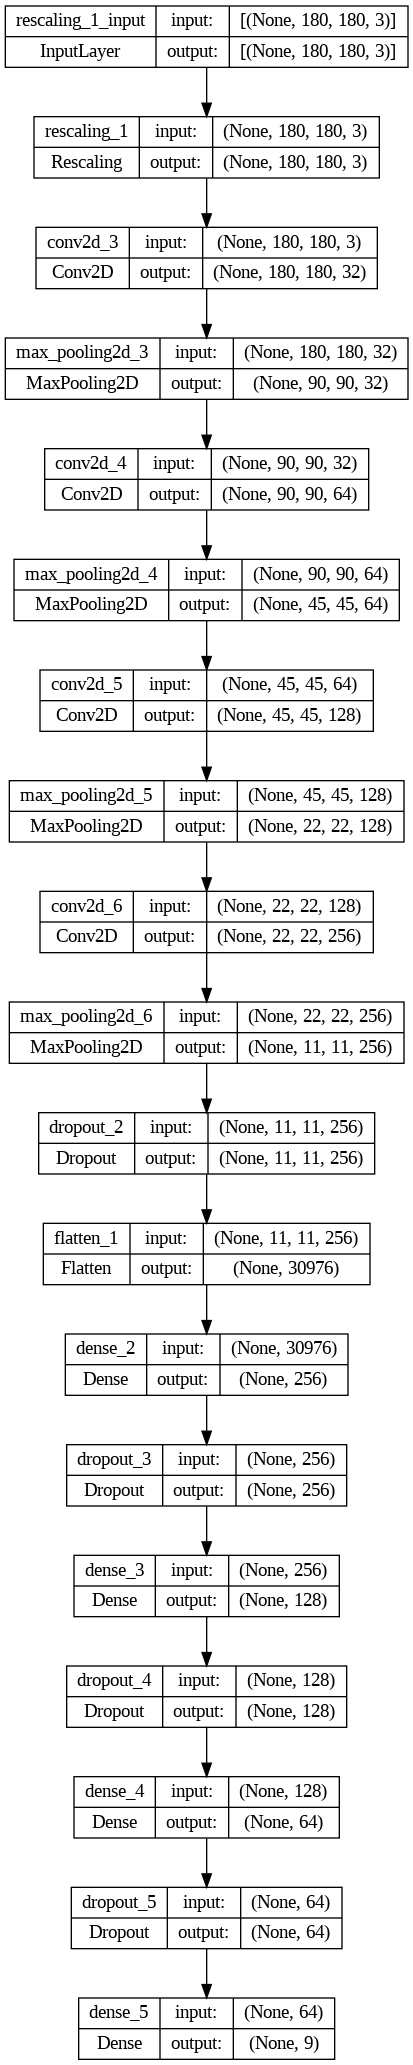

In [30]:
# vizualizing the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [31]:
## your code goes here
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.

checkpoint_filepath = 'D:\AI-ML\Main Course Content\Deep Learning\Melanoma Assignment\checkpoint.weights.keras'
checkpoint = keras.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    initial_value_threshold=None,
)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

#### **Todo:**  Train your model

In [32]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  # callbacks=[checkpoint,earlystop]
)


Epoch 1/50
281/281 [==============================] - 77s 251ms/step - loss: 2.1092 - accuracy: 0.1613 - val_loss: 1.9810 - val_accuracy: 0.2056
Epoch 2/50
281/281 [==============================] - 68s 237ms/step - loss: 1.7689 - accuracy: 0.2935 - val_loss: 1.6176 - val_accuracy: 0.3712
Epoch 3/50
281/281 [==============================] - 66s 231ms/step - loss: 1.5902 - accuracy: 0.3759 - val_loss: 1.4931 - val_accuracy: 0.4143
Epoch 4/50
281/281 [==============================] - 67s 235ms/step - loss: 1.5107 - accuracy: 0.4069 - val_loss: 1.5754 - val_accuracy: 0.3721
Epoch 5/50
281/281 [==============================] - 67s 233ms/step - loss: 1.5058 - accuracy: 0.4061 - val_loss: 1.4012 - val_accuracy: 0.4437
Epoch 6/50
281/281 [==============================] - 66s 232ms/step - loss: 1.4163 - accuracy: 0.4399 - val_loss: 1.3664 - val_accuracy: 0.4473
Epoch 7/50
281/281 [==============================] - 66s 231ms/step - loss: 1.3857 - accuracy: 0.4505 - val_loss: 1.3556 - val_ac

#### **Todo:**  Visualize the model results

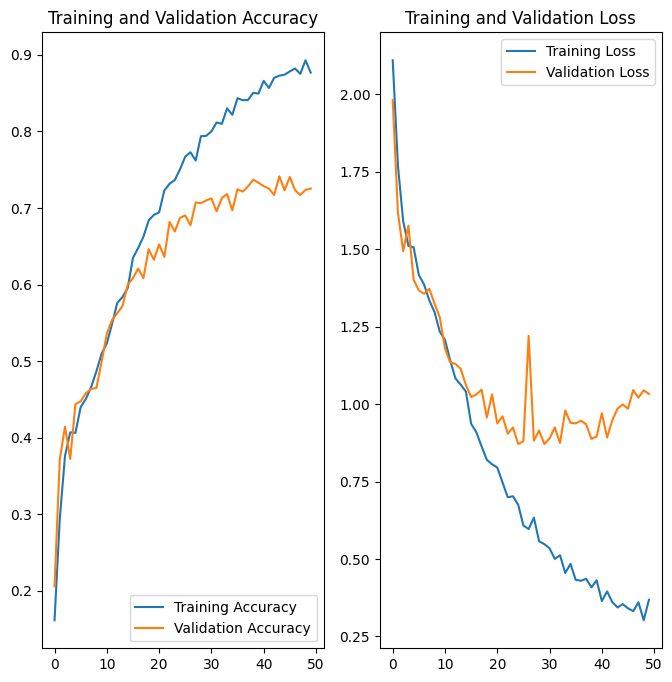

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Model Prediction

1/1 [==============================] - 1s 523ms/step
Actual Class pigmented benign keratosis
Predictive Class pigmented benign keratosis


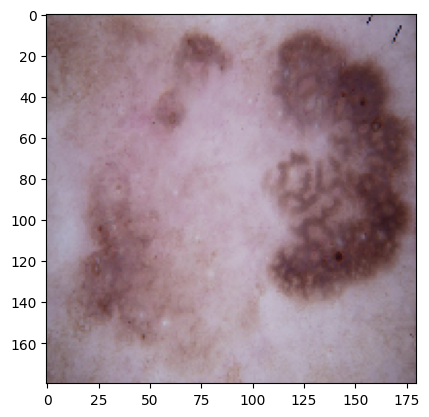

In [34]:
Test_image_path = os.path.join(data_dir_test, class_names[5], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-5],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[5] +'\n'+ "Predictive Class "+pred_class )